In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same
dataset. See if you can get them to produce roughly the same model.


#### load dataset

In [45]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]].values
y = iris.target

In [47]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

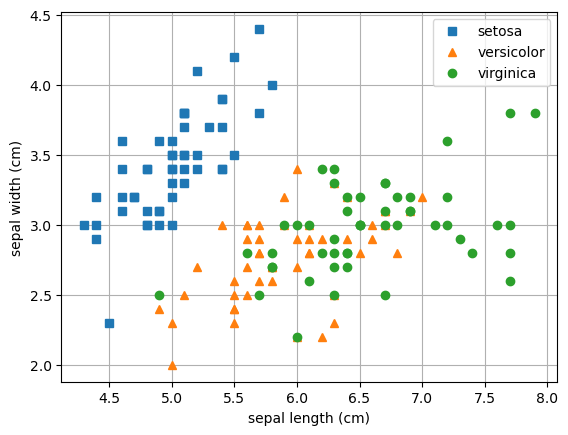

In [52]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s", label="setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", label="versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o", label="virginica")
plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.grid()

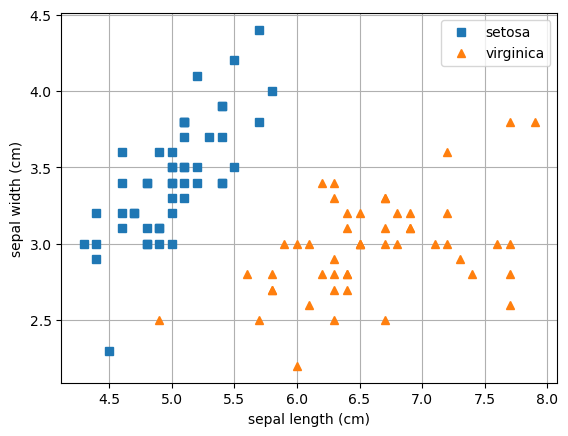

In [54]:
# iris versicolor sepal are not linearly separable from iris virginica sepal so we will use setosa and virginica

X = X[y != 1]
y = y[y != 1]

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s", label="setosa")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "^", label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.grid()

In [58]:
C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

In [76]:
def decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = decision_boundary(lin_clf)
svc_line = decision_boundary(svc_clf)
sgd_line = decision_boundary(sgd_clf)

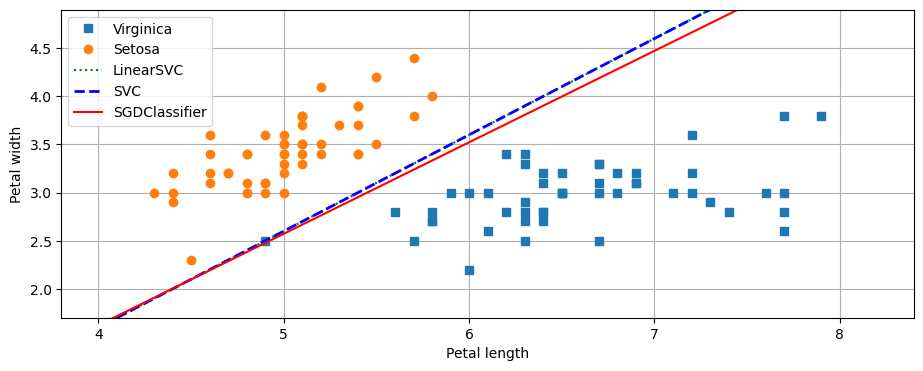

In [103]:
plt.figure(figsize=(11, 4))
axes = [X[:, 0].min()-0.5, X[:, 0].max()+0.5, X[:, 1].min()-0.5, X[:, 1].max()+0.5]

plt.plot(X[:, 0][y==2], X[:, 1][y==2], "s", label="Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "o", label="Setosa")

plt.plot(lin_line[:, 0], lin_line[:, 1], "g:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")

plt.legend()
plt.axis([axes[0], axes[1], axes[2], axes[3]])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()

### SVC and LinearSVC produce roughly the same model